### Perform hierarchical and K-means clustering on the dataset. After that, perform PCA on the dataset and extract the first 3 principal components and make a new dataset with these 3 principal components as the columns. Now, on this new dataset, perform hierarchical and K-means clustering. Compare the results of clustering on the original dataset and clustering on the principal components dataset (use the scree plot technique to obtain the optimum number of clusters in K-means clustering and check if you’re getting similar results with and without PCA).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.cluster.hierarchy import linkage 
import scipy.cluster.hierarchy as sch 
from sklearn.cluster import AgglomerativeClustering

In [3]:
df=pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Dimension reduction application\wine.csv")

In [60]:
#eda
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
#preprocessing
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return (x)

In [6]:
df_norm=norm_func(df.iloc[:,1:])

In [8]:
df_norm.to_csv('c.test.csv')

In [9]:
#denderogram
z=linkage(df_norm,method="complete", metric="euclidean")

{'icoord': [[25.0, 25.0, 35.0, 35.0],
  [15.0, 15.0, 30.0, 30.0],
  [5.0, 5.0, 22.5, 22.5],
  [55.0, 55.0, 65.0, 65.0],
  [45.0, 45.0, 60.0, 60.0],
  [75.0, 75.0, 85.0, 85.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [80.0, 80.0, 102.5, 102.5],
  [52.5, 52.5, 91.25, 91.25],
  [13.75, 13.75, 71.875, 71.875],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [42.8125, 42.8125, 132.5, 132.5],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [190.0, 190.0, 210.0, 210.0],
  [162.5, 162.5, 200.0, 200.0],
  [225.0, 225.0, 235.0, 235.0],
  [255.0, 255.0, 265.0, 265.0],
  [275.0, 275.0, 285.0, 285.0],
  [260.0, 260.0, 280.0, 280.0],
  [245.0, 245.0, 270.0, 270.0],
  [230.0, 230.0, 257.5, 257.5],
  [305.0, 305.0, 315.0, 315.0],
  [325.0, 325.0, 335.0, 335.0],
  [310.0, 310.0, 330.0, 330.0],
  [295.0, 295.0, 320.0, 320.0],
  [345.0, 345.0, 355.0, 355.0],
  [375.0, 375.0, 385.0, 

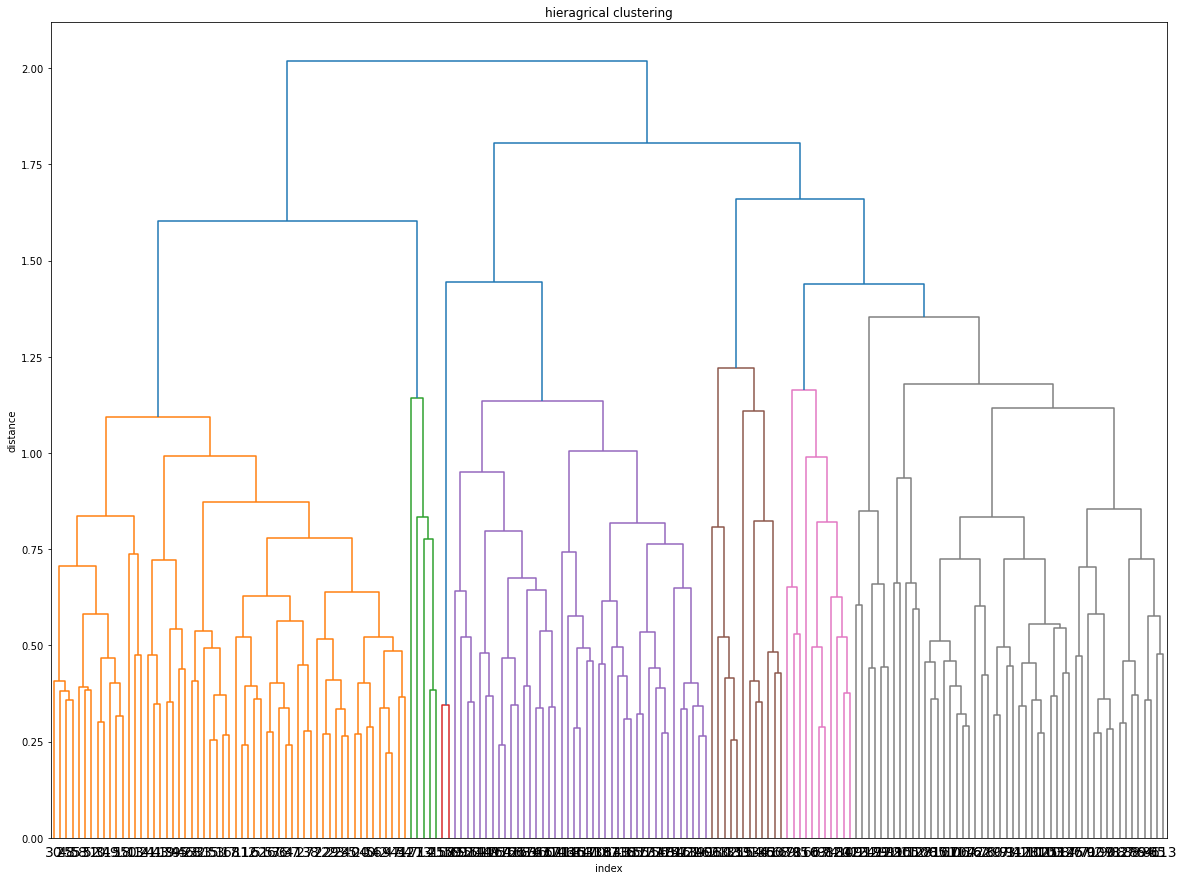

In [12]:
plt.figure(figsize=(20,15));plt.title('hieragrical clustering');plt.xlabel('index');plt.ylabel("distance")
sch.dendrogram(z,leaf_rotation=0,leaf_font_size=14)

In [15]:
#AgglomerativeClustering
h_complete = AgglomerativeClustering(n_clusters = 6, linkage = 'complete', affinity = "euclidean").fit(df_norm) 
h_complete.labels_

array([4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       1, 3, 3, 3, 5, 5, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

In [19]:
cluster_labels=pd.Series(h_complete.labels_)

In [23]:
df_norm['clust']=cluster_labels

In [36]:
df_2=df_norm.iloc[:,[0,1,2,4,5,6]]

In [40]:
df_2.iloc[:,2:].groupby(df_norm.clust).mean()

,Ash,Magnesium,Phenols,Flavanoids
clust,,,,
0,0.463400,0.249644,0.439288,0.373418
1,0.466578,0.366848,0.263793,0.138186
2,0.833155,0.513043,0.686897,0.611814
3,0.575845,0.308324,0.231455,0.089637
4,0.574819,0.389397,0.642952,0.559664
5,0.700535,0.255435,0.593103,0.182489


In [45]:
final = pd.DataFrame(df_2.iloc[:, 2:].groupby(df_norm.clust).mean())
final.to_csv('c:test1.csv')


In [48]:
#PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [49]:
pca=PCA(n_components=13)
pca_values=pca.fit_transform(df_norm)

In [51]:
var=pca.explained_variance_ratio_


In [52]:
pca.components_[0]

array([ 0.09733057,  0.02318811,  0.03052851, -0.02624525,  0.02792425,
        0.03289591,  0.02263694, -0.01337724,  0.00993879,  0.07083983,
       -0.01852684,  0.00422882,  0.09002728,  0.9860182 ])

In [53]:
#cumulative variance 
import numpy as np
var1=np.cumsum(np.round(var,decimals=4)*100)

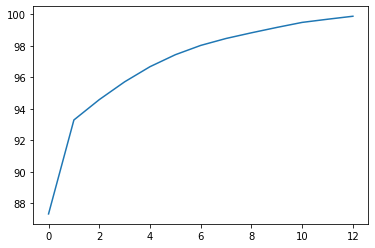

In [54]:
plt.plot(var1)

In [55]:
pca_values

array([[ 1.90530401e+00, -5.90889376e-01,  1.94487784e-02, ...,
        -1.48722146e-01,  4.84117276e-02, -3.51782765e-02],
       [ 1.85693484e+00, -4.08396771e-01, -2.70337877e-01, ...,
        -7.42452590e-02,  5.19295065e-02, -5.21198160e-02],
       [ 1.88176581e+00, -4.19418385e-01,  1.93148875e-01, ...,
        -1.08707971e-03, -2.40424619e-02, -8.62566614e-02],
       ...,
       [ 8.79760289e-01,  7.31305554e-01, -5.12326197e-02, ...,
        -1.01587168e-01,  1.68853275e-01,  5.77895649e-02],
       [ 8.64527293e-01,  6.60164536e-01, -1.07068603e-01, ...,
        -1.62359669e-01,  5.12321678e-02,  3.75873314e-02],
       [ 8.73755370e-01,  8.03007403e-01,  2.79853642e-01, ...,
         3.25357424e-02, -1.12990650e-02,  9.32713033e-03]])

In [104]:
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5","comp6","comp7","comp8","comp9","comp10","comp11","comp12"
final = pd.concat([df, pca_data.iloc[:, 0:6]], axis = 1)

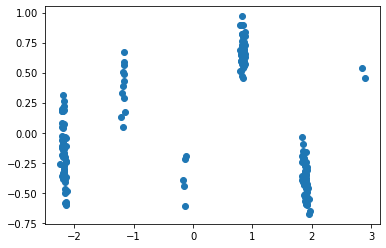

In [105]:
# Scatter diagram
import matplotlib.pylab as plt
plt.scatter(x = final.comp0, y = final.comp1)

### A pharmaceuticals manufacturing company is conducting a study on a new medicine to treat heart diseases. The company has gathered data from its secondary sources and would like you to provide high level analytical insights on the data. Its aim is to segregate patients depending on their age group and other factors given in the data. Perform PCA and clustering algorithms on the dataset and check if the clusters formed before and after PCA are the same and provide a brief report on your model. You can also explore more ways to improve your model. 

In [2]:
df=pd.read_csv(r"C:\Users\tarun\Documents\taruns imp\Data science material\assignments\SETS\Dimension reduction application\heart disease.csv")

In [4]:
#EDA
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [34]:
#preprocessig
def norm_func(i):
    x = (i-i.min())	/ (i.max()-i.min())
    return (x)

In [35]:
df_norm=norm_func(df.iloc[:,1:])

In [36]:
df_norm.to_csv('c:test.csv')

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [75.0, 75.0, 85.0, 85.0],
  [95.0, 95.0, 105.0, 105.0],
  [80.0, 80.0, 100.0, 100.0],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [115.0, 115.0, 132.5, 132.5],
  [90.0, 90.0, 123.75, 123.75],
  [65.0, 65.0, 106.875, 106.875],
  [27.5, 27.5, 85.9375, 85.9375],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [215.0, 215.0, 225.0, 225.0],
  [200.0, 200.0, 220.0, 220.0],
  [180.0, 180.0, 210.0, 210.0],
  [165.0, 165.0, 195.0, 195.0],
  [155.0, 155.0, 180.0, 180.0],
  [56.71875, 56.71875, 167.5, 167.5],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [265.0, 265.0, 275.0, 275.0],
  [242.5, 242.5, 270.0, 270.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [302.5, 302.5, 332.5, 332.5],
  [285.0, 285.0, 3

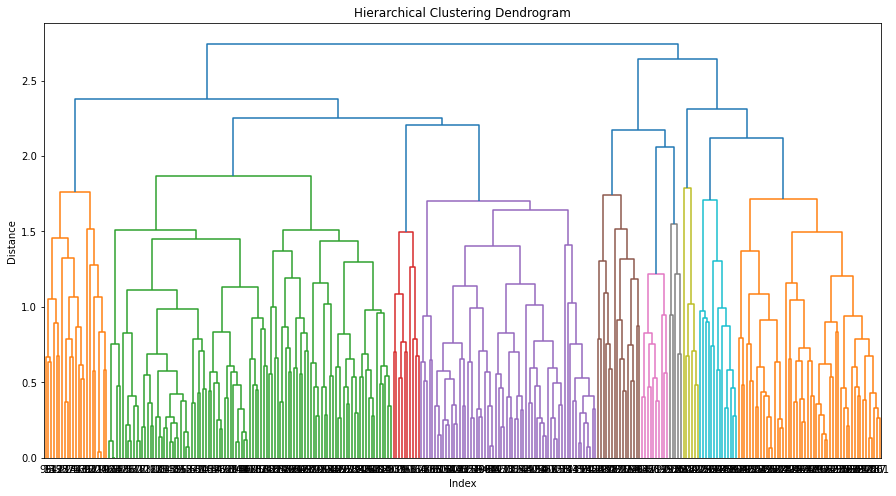

In [37]:
#denderogram
z=linkage(df_norm,method="complete", metric="euclidean")
plt.figure(figsize=(15, 8));plt.title('Hierarchical Clustering Dendrogram');plt.xlabel('Index');plt.ylabel('Distance')
sch.dendrogram(z,leaf_rotation = 0,leaf_font_size = 10)

In [41]:
h_complete = AgglomerativeClustering(n_clusters = 5, linkage = 'complete', affinity = "euclidean").fit(df_norm) 


In [42]:
cluster_labels = pd.Series(h_complete.labels_)

In [43]:

df['clust'] = cluster_labels

In [44]:
df_3 = df.iloc[:, [0,1,2,3,4]]

In [45]:
df_3.iloc[:, 2:].groupby(df.clust).mean

<bound method GroupBy.mean of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000001D04A7F2D00>>

In [47]:
final = pd.DataFrame(df_3.iloc[:, 2:].groupby(df.clust).mean())

In [48]:
final.to_csv('c:test1.csv')

In [50]:
#PCA on aggregated data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [51]:
pca = PCA(n_components = 13)
pca_values = pca.fit_transform(df_norm)

In [52]:
var = pca.explained_variance_ratio_
var

array([0.33851043, 0.15612633, 0.10568991, 0.10088632, 0.07268353,
       0.05255189, 0.05121946, 0.03776459, 0.02747347, 0.01919504,
       0.01540303, 0.01318208, 0.00931391])

In [53]:
pca.components_
pca.components_[0]

array([ 0.30431701, -0.29053375,  0.02936845,  0.00939496,  0.02596376,
       -0.06174351, -0.13177272,  0.51978432,  0.13736207, -0.19908006,
        0.14501454,  0.11675556, -0.6609403 ])

In [54]:
import numpy as np
var1 = np.cumsum(np.round(var, decimals = 4) * 100)
var1

array([ 33.85,  49.46,  60.03,  70.12,  77.39,  82.65,  87.77,  91.55,
        94.3 ,  96.22,  97.76,  99.08, 100.01])

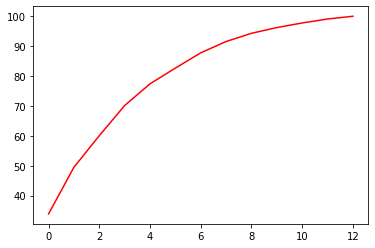

In [55]:
plt.plot(var1, color = "red")

In [56]:
pca_values

array([[-0.44019342, -0.49621189,  0.7326431 , ..., -0.04336442,
         0.03895567,  0.03878076],
       [-0.37568915, -0.36185537,  0.00295065, ..., -0.31275192,
         0.18061581,  0.06420851],
       [-0.78379395,  0.46210618, -0.02480778, ..., -0.02877018,
         0.2107969 , -0.16318184],
       ...,
       [ 0.56350188, -0.3542081 ,  0.90284044, ...,  0.04017307,
         0.20968726, -0.12758995],
       [ 0.99327205,  0.04569311, -0.3133098 , ...,  0.12763115,
        -0.12662957, -0.23552701],
       [-0.01940264,  0.53067222,  0.50985362, ..., -0.2759846 ,
        -0.17522577, -0.08389318]])

In [58]:
pca_data = pd.DataFrame(pca_values)
pca_data.columns = "comp0", "comp1", "comp2", "comp3", "comp4", "comp5","comp6","comp7","comp8","comp9","comp10","comp11","comp12"
final = pd.concat([df, pca_data.iloc[:, 0:6]], axis = 1)

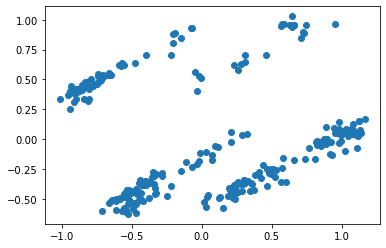

In [59]:
# Scatter diagram
import matplotlib.pylab as plt
plt.scatter(x = final.comp0, y = final.comp1)